## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparing the data

In [2]:
data = pd.read_csv('./dataset/iris.csv') # Load the data using pandas

Get a glimpse of the data

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's get some information of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
print(f'Number of columns: {len(data.columns)}')

Number of columns: 5


In [7]:
print(f'Number of rows: {len(data)}')

Number of rows: 150


Let's see the data description

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's see the correlation of each columns except for the `species`

In [9]:
data.drop(['species'], axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Let's see if the data contains missing values

In [10]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Let's see if the data contains outliers

In [11]:
def get_outliers_indices(col: pd.DataFrame, threshold=3):
    data_arr = np.asarray(col.values.tolist())
    z_scores = (data_arr - np.mean(data_arr)) / np.std(data_arr)
    
    indices = np.nonzero(np.abs(z_scores) > threshold)[0]
    
    return indices

In [12]:
for col in data.drop(['species'], axis=1):
    outliers_indices = get_outliers_indices(data[col])
    print(f'There are {len(outliers_indices)} in {col}')

There are 0 in sepal_length
There are 1 in sepal_width
There are 0 in petal_length
There are 0 in petal_width


Let's see how many species there is in the data

In [13]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Let's see if there's any duplicated data

In [14]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


Conclusion:
- There are no missing values
- There are one outliers in the column: `sepal_width`
- There are three duplicated values in the data

## Preprocessing the data

Since there are no missing values and categorical data, we can continue to handle outliers

In [15]:
for col in data.drop(['species'], axis=1):
    outliers_indices = get_outliers_indices(data[col])
    data: pd.DataFrame = data.drop(outliers_indices)
    print(f'Removed {len(outliers_indices)} outliers, from {col}')

Removed 0 outliers, from sepal_length
Removed 1 outliers, from sepal_width
Removed 0 outliers, from petal_length
Removed 0 outliers, from petal_width


Since the data is already scaled, we don't have to scale it again. So let's continue to the Dimensionality Reduction. We'll use PCA method

In [16]:
def apply_pca(X: np.ndarray, n_dimensions=2):
    # Get the mean along the first axis
    mean_X = np.mean(X)
    
    # Get the X centered
    X_center = X - mean_X
    
    # Create the covariance matrix
    cov = np.cov(X_center.T)
    
    # Create the eigenvalues and eigenvector using the covariance matrix
    eigenvalues, eigenvector = np.linalg.eig(cov)
    
    # Transpose the eigenvector
    eigenvector = eigenvector.T
    
    # Get the sorted indices reversed
    indices = np.argsort(eigenvalues)[::-1]
    
    # Reorder the eigenvector
    eigenvector = eigenvector[indices]
    
    # Get the desired features based on the n_dimensions
    features = eigenvector[:n_dimensions]
    
    return np.dot(X_center, features.T)

In [17]:
# Turn the data's values into a numpy array
data_properties = np.asarray(data.drop(['species'], axis=1).values.tolist())

# Reduced dimension values
pca_values = apply_pca(data_properties)

# Make a new Data Frame using the previous values
pca_data = pd.DataFrame(pca_values, columns=['Col1', 'Col2'])
pca_data.head()

,Col1,Col2
0,-2.348615,-1.765680
1,-2.382715,-1.272874
2,-2.556712,-1.302130
3,-2.414270,-1.127383
4,-2.392830,-1.771227


## Making the model

In [18]:
X = pca_values

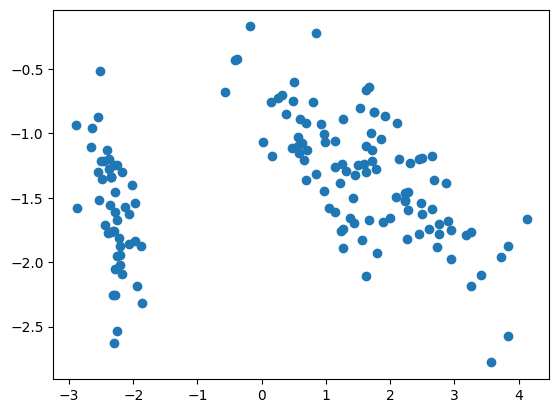

In [19]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

I think it's supposed to be divided into 3 clusters. Let's make the visualization function first

In [20]:
def plot_cluster(X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X')
    plt.show()

Now let's actually make the model

In [21]:
class KMeans:
    def __init__(self, k, max_iters=300) -> None:
        self.k = k
        self.max_iters = max_iters
        self._centroids = None
        self._labels = None
        self._inertia = None
    
    def _assign_labels(self, X: np.ndarray, centroids: np.ndarray):
        # Calculate the distances using the euclidean distance
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X: np.ndarray, labels: np.ndarray):
        centroids = np.zeros((self.k, X.shape[1]))

        # Find the mean
        for i in range(self.k):
            centroids[i] = np.mean(X[labels == i], axis=0)
        
        return centroids
    
    def _calc_inertia(self, X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
        # Sum of squared distances
        inertia = 0
        
        for i in range(self.k):
            # Get the data points in this cluster
            cluster_points = X[labels == i]
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
        
        return inertia
    
    def fit(self, X: np.ndarray, visualize=False):
        # Initialize centroids in random data points
        centroids = X[np.random.choice(X.shape[0], self.k)]
        labels = self._assign_labels(X, centroids)
        
        for i in range(self.max_iters):
            labels = self._assign_labels(X, centroids)
            new_centroids = self._update_centroids(X, labels)
            
            # If the centroids does not change at all
            if np.all(centroids == new_centroids):
                if visualize:
                    print(f'Last Iteration {i + 1}')
                    plot_cluster(X, centroids, labels)
                break
            
            if visualize and i % 5 == 0:
                print(f'Iteration {i + 1}')
                plot_cluster(X, centroids, labels)
            
            # Set the centroids to the new centroids
            centroids = new_centroids
        
        self._centroids = centroids
        self._labels = labels
        self._inertia = self._calc_inertia(X, centroids, labels)

Iteration 1


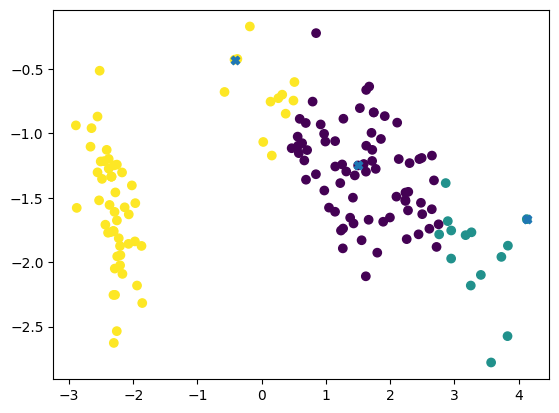

Iteration 6


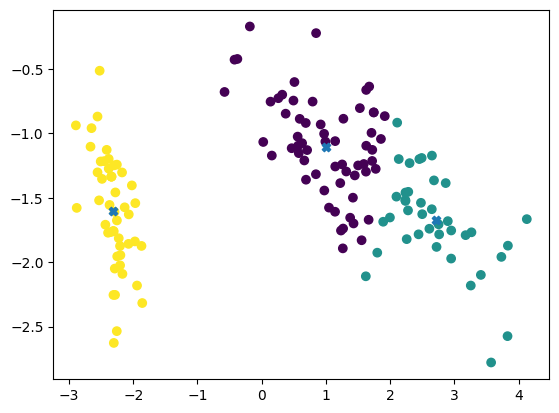

Last Iteration 7


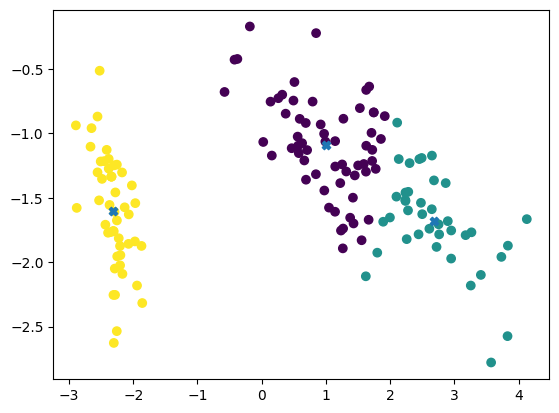

In [22]:
model = KMeans(3) # Since we have 3 species
model.fit(X, visualize=True)

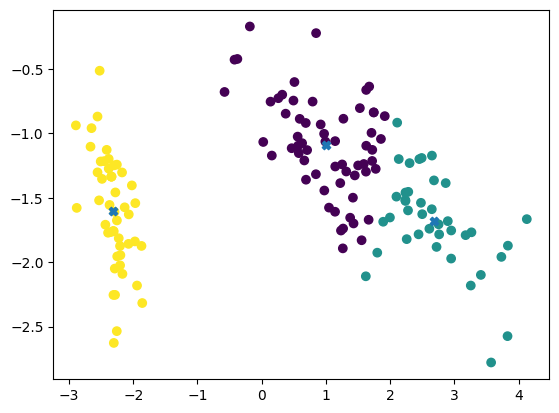

In [23]:
plot_cluster(X, model._centroids, model._labels)

## Evaluating the model

In [24]:
def elbow_method(max_k=10):
    # Sum of Squared Distances
    ssd = list()
    
    for k in range(1, max_k + 1):
        test_model = KMeans(k)
        test_model.fit(X)
        ssd.append(test_model._inertia)
        
    plt.plot(range(1, max_k + 1), ssd, marker='o')
    plt.xlabel('Value of k')
    plt.ylabel('Sum of Squared Distances')
    plt.show()

C:\Users\sitia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sitia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


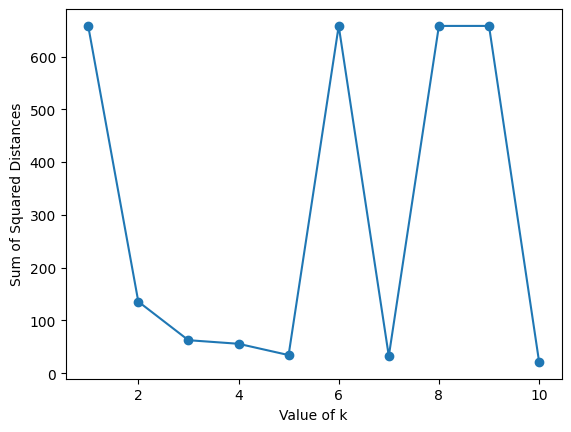

In [25]:
elbow_method(10)

Thus, the optimal value of `k` is 3

Let's assign the label to the main DataFrame

In [26]:
data['label'] = model._labels

In [27]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
